In [10]:
import numpy as np
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

import re
from datetime import timedelta, datetime


In [11]:
# root = "/Users/Lam/PycharmProjects/untitled/aws/"
# file_name = "temp.log"
# lines = [line.rstrip('\n') for line in open(root+file_name)]

In [ ]:
file_name = "temp.log"
lines = [line.rstrip('\n') for line in open(file_name)]

In [12]:
dt_lst = []
for line in lines:
    date_str = re.search('\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2}', line)
    dt_line = datetime.strptime(date_str.group(), '%Y-%m-%dT%H:%M:%S')
    dt_lst.append(dt_line)

In [13]:
sr_dt = Series(dt_lst, name='Request_Time')
# Create a DataFrame using the Request_Time Series
df = DataFrame(sr_dt)
# Create an array of 1's using Numpy
count = sr_dt.size
ones = np.ones(count, dtype=int)
# Add the ones array to the DataFrame with the header "Counts"
df['Counts'] = ones
grouped = df.groupby('Request_Time').count()


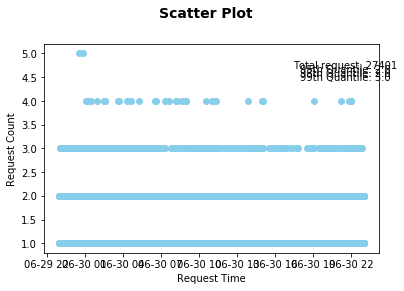

In [14]:
ninety_five_quant = grouped.quantile(.95)[0]  # [0] since we only need the quantile value
ninety_ninth_quant = grouped.quantile(.99)[0]  # [0] since we only need the quantile value
ninety_eight_quant = grouped.quantile(.98)[0]  # [0] since we only need the quantile value
total_req = 'Total request: ' + str(count)
nine_five_quant_str = '95th Quantile: ' + str(ninety_five_quant)
nine_eight_quant_str = '98th Quantile: ' + str(ninety_eight_quant)
nine_nine_quant_str = '99th Quantile: ' + str(ninety_ninth_quant)
# x and y axis values are extracted from the grouped DataFrame
x = grouped.index
y = grouped.values
# print 'Plotting Graph..'
fig = plt.figure()
fig.suptitle('Scatter Plot', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel('Request Time')
ax.set_ylabel('Request Count')
text_x_axis_value = 0.9
ax.text(text_x_axis_value, 0.90, total_req, horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes)
ax.text(text_x_axis_value, 0.88, nine_five_quant_str, horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes)
ax.text(text_x_axis_value, 0.86, nine_eight_quant_str, horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes)
ax.text(text_x_axis_value, 0.84, nine_nine_quant_str, horizontalalignment='center', verticalalignment='center',
        transform=ax.transAxes)
ax.plot_date(x, y, xdate=True, ydate=False, color='skyblue')
plt.show()

# fig.savefig('plot.png')

In [15]:
dt_lst_2 = []

for line in lines:
    serial_num = re.search('ser=[a-zA-Z0-9]+\\s{1}', line)
    sl_line = serial_num.group().strip().replace("ser=","")
    dt_lst_2.append(sl_line)


In [16]:
global count, grouped
    # Create a Series named "Request_Time"
sr_dt = Series(dt_lst, name='Request_Time')
# Create a DataFrame using the Request_Time Series
df = DataFrame(sr_dt)
# Create an array of 1's using Numpy
count = sr_dt.size
ones = np.ones(count, dtype=int)
# Add the ones array to the DataFrame with the header "Counts"
df['Counts'] = ones

df['Serial'] = Series(dt_lst_2, name='Serial')


In [17]:
df.groupby(['Serial','Request_Time'], as_index=False).sum()
# df.groupby('Serial').sum()

,Serial,Request_Time,Counts
0,0123456789ABCDEF,2019-06-29 23:47:50,1
1,0123456789ABCDEF,2019-06-29 23:58:05,1
2,0123456789ABCDEF,2019-06-30 00:47:56,1
3,0123456789ABCDEF,2019-06-30 00:58:04,1
4,0123456789ABCDEF,2019-06-30 01:48:00,1
5,0123456789ABCDEF,2019-06-30 01:58:04,1
6,0123456789ABCDEF,2019-06-30 02:58:04,1
7,0123456789ABCDEF,2019-06-30 03:58:09,1
8,0123456789ABCDEF,2019-06-30 04:58:04,1
9,0123456789ABCDEF,2019-06-30 05:58:04,1


In [149]:
df.groupby('Serial').count().sort_values(['Counts'],ascending=False).iloc[0].name

'356596053961212'

In [18]:
df.loc[df['Serial'] == df.groupby('Serial').count().sort_values(['Counts'],ascending=False).iloc[0].name]

,Request_Time,Counts,Serial
129,2019-06-29 23:50:31,1,356593054297746
448,2019-06-29 23:20:31,1,356593054297746
662,2019-06-30 01:38:22,1,356593054297746
791,2019-06-30 01:50:31,1,356593054297746
923,2019-06-30 01:01:57,1,356593054297746
1124,2019-06-30 01:20:31,1,356593054297746
1472,2019-06-30 02:50:31,1,356593054297746
1795,2019-06-30 02:20:32,1,356593054297746
1966,2019-06-30 02:00:56,1,356593054297746
3400,2019-06-30 03:50:31,1,356593054297746


In [19]:
df.groupby('Serial').count().sort_values(['Counts'],ascending=False).head(3)

,Request_Time,Counts
Serial,,
356593054297746,81,81
bf06b25f,78,78
LGV34d7ea353,59,59


In [20]:
import seaborn as sns

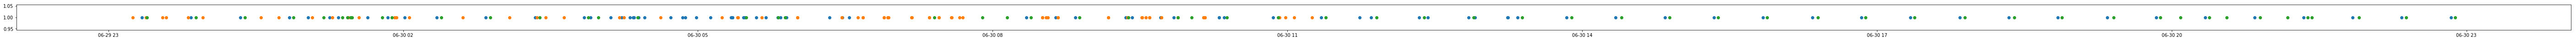

In [22]:
for i in range(3):
    name = df.groupby('Serial').count().sort_values(['Counts'],ascending=False).iloc[i].name
    result = df.loc[df['Serial']== name]
    plt.plot_date(result['Request_Time'],result['Counts'])

plt.rcParams["figure.figsize"] = (500,1)
plt.show()
#fig.savefig('plot.png')